In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt

In [16]:
data = {
    "Temperature (°C)": [30, 25, 32, 28, 22, 29, 27, 33],
    "Humidity (%)": [70, 80, 65, 75, 85, 68, 73, 60],
    "Wind Speed (km/h)": [15, 10, 20, 12, 25, 18, 14, 9],
    "Condition": ["Sunny", "Rainy", "Sunny", "Cloudy", "Rainy", "Cloudy", "Windy", "Sunny"],
    "Visibility (km)": [10, 5, 12, 8, 3, 7, 9, 15]
}

In [17]:
df = pd.DataFrame(data)

In [18]:
label_encoder = LabelEncoder()
df["Condition"] = label_encoder.fit_transform(df["Condition"])

In [19]:
X = df.drop(columns=["Visibility (km)"])
y = df["Visibility (km)"]

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [22]:
y_pred = model.predict(X_test)

In [23]:
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")

Mean Absolute Error: 2.0


In [24]:
new_weather = [[28, 78, 16, label_encoder.transform(["Cloudy"])[0]]]
predicted_visibility = model.predict(new_weather)
print(f"Predicted Visibility: {predicted_visibility[0]} km")

Predicted Visibility: 8.0 km


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


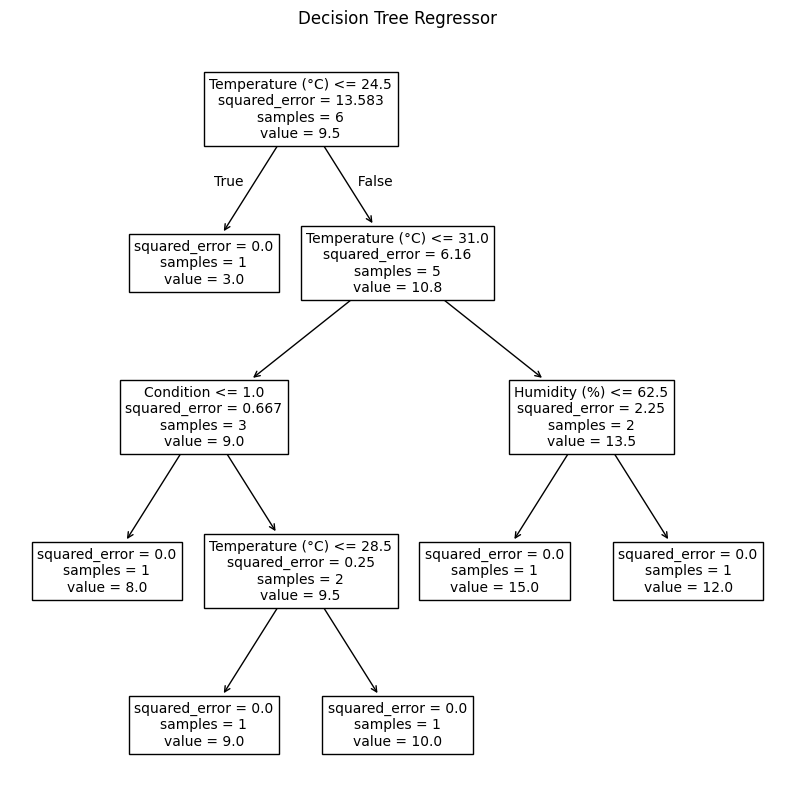

In [25]:
plt.figure(figsize=(10,10))
plot_tree(model, feature_names=X.columns)
plt.title("Decision Tree Regressor")
plt.show()